In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

## Lectura de la información

In [2]:
stop_words = pd.read_csv("information/stop_words.csv")
stop_words.head()

,stop_words
0,a
1,actualmente
2,adelante
3,además
4,afirmó


In [3]:
sentiment_text = pd.read_csv("information/sentiment_analysis_dataset.csv")
sentiment_text.head()

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared


In [4]:
sentiment_text['emotion'] = sentiment_text['emotion'].astype('category')
sentiment_text['sentiment'] = sentiment_text['sentiment'].astype('category')
sentiment_text.dtypes

user           object
text           object
date           object
emotion      category
sentiment    category
dtype: object

### Entendiendo los datos

In [5]:
sentiment_text.shape

(2590, 5)

In [6]:
sentiment_text.describe()

,user,text,date,emotion,sentiment
count,2590,2590,2590,2590,2590
unique,2083,2191,949,20,6
top,@Yaramsi3,"Para entender el mundo, lee. Para entenderte ...","Jan 6, 2024 · 3:38 AM UTC",thankful,peaceful
freq,12,6,25,150,660


<Axes: xlabel='sentiment', ylabel='Count'>

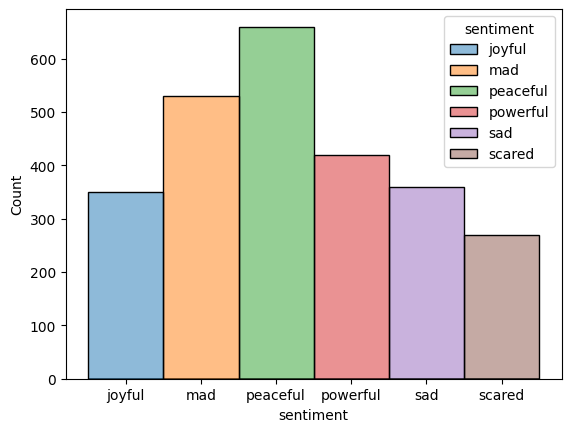

In [7]:
sns.histplot(sentiment_text, x="sentiment", hue="sentiment")

In [8]:
counter_general = {}
for sentiment in sentiment_text['emotion']:
    if(counter_general.get(sentiment) == None):
        counter_general[sentiment] = 0
    counter_general[sentiment] = counter_general[sentiment] + 1

print(counter_general)

{'overwhelmed': 140, 'embarrassed': 130, 'jealous': 140, 'irritated': 140, 'frustrated': 120, 'distant': 130, 'stupid': 90, 'isolated': 120, 'sleepy': 150, 'responsive': 110, 'relaxed': 130, 'loving': 130, 'thankful': 150, 'secure': 140, 'confident': 140, 'successful': 140, 'surprised': 140, 'playful': 130, 'optimistic': 110, 'daring': 110}


In [9]:
counter_general.get("ddf") == None

True

### Estandarizando la información

In [13]:
sentiment_text['text'] = sentiment_text['text'].apply(str.lower)

### Creando el modelo

In [42]:
clean_text = []

for text in sentiment_text['text']:
    token_list = text.split()
    valid_token = []
    for token in token_list:
        is_valid_text = re.search(r'^[\w|\s|\d]+$', token)
        if not token in stop_words.values and is_valid_text and is_valid_text.group():
            valid_token.append(token)
    clean_text.append(" ".join(valid_token))
clean_text

['termine abrumado',
 'siento abrumado',
 'siento abrumado cantidad quiero jugar odio sensación xdddd',
 'salvador única persona abrumado',
 'denme helado ando full',
 'abrumado airdrops youtube imposible gestionarlo mueve determino plan quemo',
 'motivo razones quizás venían nostalgias dejaban paralizado hablaba',
 'tesoros venideros preciados trabajador abrumado sueño fugaz dinero parecía cambio breve respiro diversión tesoro convertido',
 'siento abrumado',
 'consejo día sientes cierra piérdete respiración',
 'aprendimos desbordado aguanta hambre resultó hijo dormido 8',
 'solucionar ley anti fake manejo información absolutamente',
 'veo presidente ego aire superioridad bastantante indolencia tragedia vive',
 'desbordado',
 'dios desbordado',
 'desbordado felicidad',
 'termino lavar vaso agua desbordado platos ollas sucias',
 'consecuencias viene 2002 default justicia hiperinflacion infraestructura destruida endeudamiento gasto publico desbordado carga tributaria confiscatoria regul

In [45]:
sentiment_text['text'] = clean_text
sentiment_text

,user,text,date,emotion,sentiment
0,@erreborda,termine abrumado,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,siento abrumado cantidad quiero jugar odio sen...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,salvador única persona abrumado,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,denme helado ando full,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared
...,...,...,...,...,...
2585,@lavivianaleyva,vivir dejen cinturón dejen casco moto cojan de...,"Jan 6, 2024 · 3:08 AM UTC",daring,joyful
2586,@Carmeen_Alicia,vida miedo éxito,"Jan 6, 2024 · 3:07 AM UTC",daring,joyful
2587,@homicidios_,esquizofrenia mente miedo realidades paralelas...,"Jan 6, 2024 · 2:59 AM UTC",daring,joyful
2588,@brigethcoba,miedo desapareces mundo,"Jan 6, 2024 · 2:55 AM UTC",daring,joyful
